# A04-Q3: `MySpline`

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## `MySpline`

In [7]:
def MySpline(x, y):
    '''
     S = MySpline(x, y)

     Input:
       x and y are arrays (or lists) of corresponding x- and y-values,
       specifying the points in the x-y plane.  The x-values
       must be in increasing order.

     Output:
       S is a function that takes x or an array (or list) of x-values
         It evaluates the cubic spline and returns the interpolated values.

     Implementation:
       
       Notice that Python's indexing starts at 0, but the lectures derived
       the equations using base-1 indexing. I suggest...
       
         a[0] = a_1          b[0] = b_1        c[0] = c_1
         a[1] = a_2          b[1] = b_2        c[1] = c_2
              :                   :                 :
         a[n-2] = a_(n-1)    b[n-2] = b_(n-1)  c[n-2] = c_(n-1)
         a[n-1] = a_n
         
       Then the i-th polynomial piece is evaluated at xx using
       
         p_i(xx) = a[i]*(x[i+1]-xx)**3/(6*hi) + a[i+1]*(xx-x[i])**3/(6*hi) +
                   b[i]*(x[i+1]-xx) + c[i]*(xx-x[i])
                   
       where hi = x[i+1] - x[i] and i = 0, ... , n-2
    '''
    n = len(x)
    h = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    a = np.zeros(n)
    
    M = np.zeros((n,n))
    r = np.zeros(n)
    
    # calculate h[i]'s
    for i in range(0, n-1):
      h[i] = x[i+1] - x[i]
    print(f"h = {h}")
    
    # populate M array
    for j in range(0, n-1):
      i = j - 1
      M[j][j-1] = h[i] / 6
      M[j][j] = ( h[i] + h[i+1] ) / 3
      M[j][j+1] = h[i+1] / 6

      r[j] = ( y[i+2] - y[i+1] ) / h[i+1] - ( y[i+1] - y[i] ) / h[i]
    print(f"M={M}")
    #set first and last row of M
    M[0][0] = y[0]
    M[0][1] = h[0] / 6
    M[-1][-1] = y[-1]
    M[-1][-2] = h[-2] / 6
    print(f"M= {M}")

    # set r values to maintain natural boundary condition

    r[-1] = 0
    r[0] = 0

    a = np.linalg.solve(M, r)
    print(f"a={a}")
    
    for i in range(0, n-1):
        b[i] = y[i] / h[i] - a[i] * h[i] / 6
        c[i] = y[i+1] / h[i] - a[i+1] * h[i] / 6
    print(f"b={b} and \nc={c}" )

    #======================================
    #
    # This is the function that gets returned.
    # It evaluates the cubic spline at xvals.
    #
    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)
         
         Evaluates the cubic spline at xvals.
         
         Inputs:
          xvals can be a scalar, or list-like (**must be in ascending order**)
          
         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]
        
        S = []  # The return list of values
        
        # 
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]

        for xx in xvals:

            # If the next x-value is not on the current piece...
            while xx>x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k])**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)
        
        return S
    #======================================
    

    return spline

## Test `MySpline`

In [8]:
# Simple data points to interpolate
y = [1, 3, 4, 2, -1, 1]
t = [0, 1, 2, 3,  4, 5]


In [9]:
# Call the function
sp = MySpline(t,y)

h = [1. 1. 1. 1. 1.]
M=[[0.66666667 0.16666667 0.         0.         0.         0.16666667]
 [0.16666667 0.66666667 0.16666667 0.         0.         0.        ]
 [0.         0.16666667 0.66666667 0.16666667 0.         0.        ]
 [0.         0.         0.16666667 0.66666667 0.16666667 0.        ]
 [0.         0.         0.         0.16666667 0.66666667 0.16666667]
 [0.         0.         0.         0.         0.         0.        ]]
M= [[1.         0.16666667 0.         0.         0.         0.16666667]
 [0.16666667 0.66666667 0.16666667 0.         0.         0.        ]
 [0.         0.16666667 0.66666667 0.16666667 0.         0.        ]
 [0.         0.         0.16666667 0.66666667 0.16666667 0.        ]
 [0.         0.         0.         0.16666667 0.66666667 0.16666667]
 [0.         0.         0.         0.         0.16666667 1.        ]]
a=[ 0.3495485  -0.6746286  -3.65103408 -2.72123507  8.53597437 -1.42266239]
b=[ 0.94174192  3.1124381   4.60850568  2.45353918 -2.42266239] and 

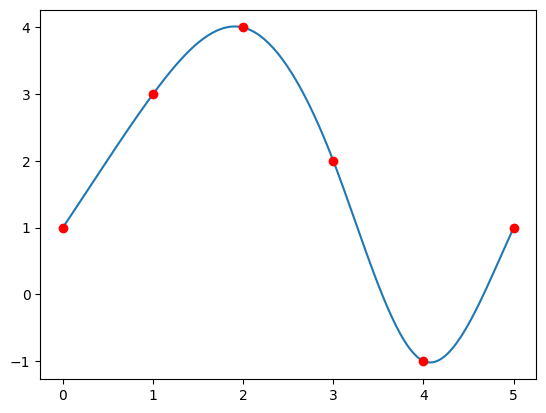

In [10]:
# Plot the spline and the interpolation points
xx = np.linspace(t[0], t[-1], 200)
plt.plot(xx, sp(xx))
plt.plot(t,y,'ro');